# Análisis del archivo indicateurs.csv

En este notebook vamos a leer y analizar el contenido del archivo `indicateurs.csv`.

In [16]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [18]:
# Primero vamos a inspeccionar el archivo para entender su estructura
csv_path = "../../indicators/indicateurs.csv"

# Intentar diferentes codificaciones
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for encoding in encodings:
    try:
        with open(csv_path, 'r', encoding=encoding) as file:
            lines = [file.readline().strip() for _ in range(15)]
        print(f"✓ Archivo leído con codificación: {encoding}")
        print("Primeras 15 líneas del archivo:")
        for i, line in enumerate(lines, 1):
            print(f"Línea {i}: {line}")
        break
    except UnicodeDecodeError:
        print(f"✗ Error con codificación: {encoding}")
        continue
else:
    print("No se pudo leer el archivo con ninguna codificación")

✗ Error con codificación: utf-8
✓ Archivo leído con codificación: latin-1
Primeras 15 líneas del archivo:
Línea 1: PK     ÛRT[éh?kr r    Data/PresetImageFill2-18.jpgÿØÿà JFIF   H H  ÿá LExif  MM *   i                           ô       ô    ÿí 8Photoshop 3.0 8BIM      8BIM%     ÔÙ ²é	ìøB~ÿÀ ôô" ÿÄ           
Línea 2: ÿÄ µ   } !1AQa"q2#B±ÁRÑð$3br
Línea 3: %&'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz¢£¤¥¦§¨©ª²³´µ¶·¸¹ºÂÃÄÅÆÇÈÉÊÒÓÔÕÖ×ØÙÚáâãäåæçèéêñòóôõö÷øùúÿÄ        
Línea 4: ÿÄ µ  w !1AQaq"2B¡±Á	#3RðbrÑ
Línea 5: $4á%ñ&'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz¢£¤¥¦§¨©ª²³´µ¶·¸¹ºÂÃÄÅÆÇÈÉÊÒÓÔÕÖ×ØÙÚâãäåæçèéêòóôõö÷øùúÿÛ C 
Línea 6
Línea 7: 
Línea 8: 
Línea 9: 
Línea 10: 
Línea 11: 
Línea 12: 
Línea 13: 
Línea 14: ÿÛ C	

In [19]:
# El archivo indicateurs.csv parece estar corrupto o no ser un CSV válido
# Vamos a probar con el archivo Excel
excel_path = "../../indicators/indicateurs.csv (1).xlsx"

try:
    # Leer el archivo Excel
    df = pd.read_excel(excel_path)
    print(f"✓ Archivo Excel leído exitosamente")
    print(f"Dimensiones del dataset: {df.shape}")
    print(f"Columnas: {list(df.columns)}")
    print("\nPrimeras 5 filas:")
    print(df.head())
    
except Exception as e:
    print(f"Error al leer el archivo Excel: {e}")
    
    # Si no funciona el Excel, probemos con otros archivos CSV
    import os
    csv_files = [f for f in os.listdir("../../indicators/") if f.endswith('.csv')]
    print(f"\nArchivos CSV disponibles: {csv_files}")
    
    # Probemos con otro archivo CSV
    for csv_file in csv_files:
        if csv_file != "indicateurs.csv":  # Saltamos el que sabemos que está corrupto
            try:
                test_path = f"../../indicators/{csv_file}"
                df_test = pd.read_csv(test_path, encoding='latin-1')
                print(f"\n✓ Archivo {csv_file} leído exitosamente")
                print(f"Dimensiones: {df_test.shape}")
                print(f"Columnas: {list(df_test.columns)}")
                break
            except Exception as e:
                print(f"✗ Error con {csv_file}: {e}")
                continue

✓ Archivo Excel leído exitosamente
Dimensiones del dataset: (156, 45)
Columnas: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44']

Primeras 5 filas:
  Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        Na

In [20]:
# El archivo Excel parece tener filas vacías al inicio
# Vamos a explorar más el contenido para encontrar los datos reales

print("Explorando el contenido del archivo Excel:")
print(f"Total de filas: {len(df)}")

# Busquemos filas que no estén completamente vacías
non_empty_rows = []
for i, row in df.iterrows():
    if not row.isna().all():  # Si la fila no está completamente vacía
        non_empty_rows.append(i)

print(f"Filas con al menos algún dato: {len(non_empty_rows)}")
if non_empty_rows:
    print(f"Primeras filas con datos: {non_empty_rows[:10]}")
    
    # Mostremos las primeras filas que contengan datos
    print("\nPrimeras 5 filas con datos:")
    for i in non_empty_rows[:5]:
        print(f"\nFila {i}:")
        print(df.iloc[i].dropna())

Explorando el contenido del archivo Excel:
Total de filas: 156
Filas con al menos algún dato: 116
Primeras filas con datos: [6, 8, 9, 10, 11, 12, 13, 18, 20, 21]

Primeras 5 filas con datos:

Fila 6:
Unnamed: 0    Marnage
Name: 6, dtype: object

Fila 8:
Unnamed: 0              période
Unnamed: 1            nb_points
Unnamed: 2    jours_disponibles
Unnamed: 3        marnage_moy_m
Unnamed: 4        marnage_max_m
Unnamed: 5        marnage_min_m
Unnamed: 6        marnage_std_m
Unnamed: 7     jours_marnage>8m
Unnamed: 8     jours_marnage>9m
Unnamed: 9                  IAI
Name: 8, dtype: object

Fila 9:
Unnamed: 0    2003-01-01 → 2008-12-31
Unnamed: 1                      26748
Unnamed: 2                       1195
Unnamed: 3                   6.160011
Unnamed: 4                       9.66
Unnamed: 5                          0
Unnamed: 6                   2.211439
Unnamed: 7                        212
Unnamed: 8                         44
Unnamed: 9                1305.922306
Name: 9, dtype

In [21]:
# Vemos que los datos están organizados en secciones
# Vamos a identificar y extraer las diferentes secciones de datos

# La fila 8 parece contener los encabezados para la tabla de marnage
header_row = 8
data_start = 9

# Extraer los encabezados de la primera sección (Marnage)
headers_marnage = df.iloc[header_row].dropna().tolist()
print("Encabezados de la sección Marnage:")
print(headers_marnage)

# Extraer los datos de marnage
# Busquemos hasta dónde van estos datos
marnage_data = []
current_row = data_start

while current_row < len(df) and not df.iloc[current_row, 0] in [None, ''] and pd.notna(df.iloc[current_row, 0]):
    row_data = df.iloc[current_row, :len(headers_marnage)].tolist()
    if any(pd.notna(val) for val in row_data):  # Si hay al menos un valor no nulo
        marnage_data.append(row_data)
    current_row += 1

# Crear DataFrame limpio para marnage
df_marnage = pd.DataFrame(marnage_data, columns=headers_marnage)
print(f"\nDatos de Marnage extraídos:")
print(f"Dimensiones: {df_marnage.shape}")
print("\nPrimeras filas:")
print(df_marnage.head())

Encabezados de la sección Marnage:
['période', 'nb_points', 'jours_disponibles', 'marnage_moy_m', 'marnage_max_m', 'marnage_min_m', 'marnage_std_m', 'jours_marnage>8m', 'jours_marnage>9m', 'IAI']

Datos de Marnage extraídos:
Dimensiones: (5, 10)

Primeras filas:
                   période  nb_points  jours_disponibles  marnage_moy_m  \
0  2003-01-01 → 2008-12-31      26748               1195       6.160011   
1  2009-01-01 → 2012-12-31      33926               1419       6.728056   
2  2013-01-01 → 2015-12-31      25943               1087       6.906577   
3  2016-01-01 → 2019-12-31      34964               1460       6.854858   
4  2020-01-01 → 2022-12-31      23736               1005       6.688142   

   marnage_max_m  marnage_min_m  marnage_std_m  jours_marnage>8m  \
0          9.660          0.000       2.211439               212   
1          9.870          0.000       1.529096               313   
2          9.815          0.000       1.493694               274   
3          9.7

In [22]:
# Ahora busquemos otras secciones de datos en el archivo
print("Buscando otras secciones de indicadores...")

# Busquemos filas que podrían ser títulos de secciones (tienen solo un valor en la primera columna)
section_titles = []
for i, row in df.iterrows():
    first_col = row.iloc[0]
    if pd.notna(first_col) and isinstance(first_col, str) and row.iloc[1:].isna().all():
        section_titles.append((i, first_col))

print("Posibles títulos de secciones encontrados:")
for idx, title in section_titles:
    print(f"Fila {idx}: {title}")

# Busquemos también filas que podrían ser encabezados (tienen múltiples valores)
potential_headers = []
for i, row in df.iterrows():
    non_na_count = row.notna().sum()
    if non_na_count >= 3:  # Al menos 3 columnas con datos
        potential_headers.append((i, row.dropna().tolist()))

print(f"\nFilas que podrían ser encabezados (con 3+ columnas):")
for idx, values in potential_headers[:10]:  # Solo las primeras 10
    print(f"Fila {idx}: {values}")

Buscando otras secciones de indicadores...
Posibles títulos de secciones encontrados:
Fila 6: Marnage
Fila 18: Etat de la mer
Fila 30: Lithologie
Fila 46: Fracturation
Fila 121: Météo
Fila 135: Géomorphologie
Fila 147: Eboulements

Filas que podrían ser encabezados (con 3+ columnas):
Fila 8: ['période', 'nb_points', 'jours_disponibles', 'marnage_moy_m', 'marnage_max_m', 'marnage_min_m', 'marnage_std_m', 'jours_marnage>8m', 'jours_marnage>9m', 'IAI']
Fila 9: ['2003-01-01 → 2008-12-31', 26748, 1195, 6.16001087866109, 9.66, 0, 2.21143915881669, 212, 44, 1305.92230627615]
Fila 10: ['2009-01-01 → 2012-12-31', 33926, 1419, 6.72805567300916, 9.87, 0, 1.52909579571378, 313, 73, 2105.88142565187]
Fila 11: ['2013-01-01 → 2015-12-31', 25943, 1087, 6.90657681692732, 9.815, 0, 1.49369367199583, 274, 69, 1892.40204783809]
Fila 12: ['2016-01-01 → 2019-12-31', 34964, 1460, 6.85485821917808, 9.752, 0, 1.47873331852439, 354, 86, 2426.61980958904]
Fila 13: ['2020-01-01 → 2022-12-31', 23736, 1005, 6.68814

In [23]:
# Extraigamos todas las secciones de datos identificadas
sections_info = {
    'Marnage': {'title_row': 6, 'header_row': 8, 'data_start': 9},
    'Etat de la mer': {'title_row': 18, 'header_row': 20, 'data_start': 21},
    'Lithologie': {'title_row': 30, 'header_row': 32, 'data_start': 33},
    'Fracturation': {'title_row': 46, 'header_row': 48, 'data_start': 49},
    'Météo': {'title_row': 121, 'header_row': 123, 'data_start': 124},
    'Géomorphologie': {'title_row': 135, 'header_row': 137, 'data_start': 138},
    'Eboulements': {'title_row': 147, 'header_row': 149, 'data_start': 150}
}

all_dataframes = {}

for section_name, info in sections_info.items():
    print(f"\n--- Extrayendo sección: {section_name} ---")
    
    # Obtener encabezados
    headers = df.iloc[info['header_row']].dropna().tolist()
    print(f"Columnas: {headers}")
    
    # Extraer datos
    section_data = []
    current_row = info['data_start']
    
    # Continuar hasta encontrar una fila vacía o el final de los datos
    while current_row < len(df):
        first_col = df.iloc[current_row, 0]
        if pd.isna(first_col) or first_col == '':
            break
            
        row_data = df.iloc[current_row, :len(headers)].tolist()
        if any(pd.notna(val) and val != '' for val in row_data):
            section_data.append(row_data)
        current_row += 1
    
    # Crear DataFrame para esta sección
    if section_data:
        section_df = pd.DataFrame(section_data, columns=headers)
        all_dataframes[section_name] = section_df
        print(f"Filas de datos: {len(section_data)}")
        print(f"Dimensiones: {section_df.shape}")
    else:
        print("No se encontraron datos en esta sección")

print(f"\n=== RESUMEN GENERAL ===")
print(f"Secciones extraídas: {len(all_dataframes)}")
for name, df_section in all_dataframes.items():
    print(f"- {name}: {df_section.shape[0]} filas, {df_section.shape[1]} columnas")


--- Extrayendo sección: Marnage ---
Columnas: ['période', 'nb_points', 'jours_disponibles', 'marnage_moy_m', 'marnage_max_m', 'marnage_min_m', 'marnage_std_m', 'jours_marnage>8m', 'jours_marnage>9m', 'IAI']
Filas de datos: 5
Dimensiones: (5, 10)

--- Extrayendo sección: Etat de la mer ---
Columnas: ['période', 'nb_points', 'hs_moy', 'hs_max', 'hs_mediane', 't02_moy', 't02_max', 'energie_moy_Jm2', 'energie_cumulee_Jm2', 'jours_houle>3m', 'jours_houle>4m', '%_houles_ouest', 'dir_moy_deg', 'IFM', 'indice_extreme']
Filas de datos: 5
Dimensiones: (5, 15)

--- Extrayendo sección: Lithologie ---
Columnas: ['formation', 'color', 'notes', 'length', 'centroid_x', 'centroid_y']
Filas de datos: 10
Dimensiones: (10, 6)

--- Extrayendo sección: Fracturation ---
Columnas: ['N°cellule hydrosédimentaire', 'taille cellule hydrosédimentaire (km)', 'segment précis (repères géographiques)', 'longueur du segment (km)', 'type de fractures (MFT ou TFT)', 'Espacement petit (m)', 'Espacement grand (m)', 'densi

In [24]:
# Mostremos ejemplos de cada sección de datos
print("=== EJEMPLOS DE DATOS DE CADA SECCIÓN ===\n")

for section_name, section_df in all_dataframes.items():
    print(f"--- {section_name.upper()} ---")
    print(f"Descripción: {section_df.shape[0]} registros con {section_df.shape[1]} variables")
    print("Columnas:", list(section_df.columns))
    print("\nPrimeras filas:")
    print(section_df.head(3))
    print("\n" + "="*80 + "\n")

# También podemos guardar cada sección como CSV separado si es necesario
print("Los datos han sido exitosamente extraídos y organizados en 7 secciones:")
print("1. Marnage - Datos de niveles del mar")
print("2. Etat de la mer - Condiciones marinas") 
print("3. Lithologie - Características geológicas")
print("4. Fracturation - Datos de fracturación")
print("5. Météo - Datos meteorológicos")
print("6. Géomorphologie - Datos geomorfológicos")
print("7. Eboulements - Datos de deslizamientos")

=== EJEMPLOS DE DATOS DE CADA SECCIÓN ===

--- MARNAGE ---
Descripción: 5 registros con 10 variables
Columnas: ['période', 'nb_points', 'jours_disponibles', 'marnage_moy_m', 'marnage_max_m', 'marnage_min_m', 'marnage_std_m', 'jours_marnage>8m', 'jours_marnage>9m', 'IAI']

Primeras filas:
                   période  nb_points  jours_disponibles  marnage_moy_m  \
0  2003-01-01 → 2008-12-31      26748               1195       6.160011   
1  2009-01-01 → 2012-12-31      33926               1419       6.728056   
2  2013-01-01 → 2015-12-31      25943               1087       6.906577   

   marnage_max_m  marnage_min_m  marnage_std_m  jours_marnage>8m  \
0          9.660            0.0       2.211439               212   
1          9.870            0.0       1.529096               313   
2          9.815            0.0       1.493694               274   

   jours_marnage>9m          IAI  
0                44  1305.922306  
1                73  2105.881426  
2                69  1892.402048

# Analyse des Éboulements et Facteurs Contributifs en France

Cette section analyse les éboulements côtiers en France en corrélant les données avec les facteurs environnementaux, géologiques et météorologiques qui peuvent influencer leur occurrence.

## Objectifs de l'analyse :
1. Analyser l'évolution temporelle des éboulements
2. Identifier les corrélations avec les conditions météorologiques
3. Étudier l'impact du marnage et des conditions marines
4. Examiner les facteurs géologiques (lithologie et fracturation)
5. Analyser l'érosion géomorphologique
6. Proposer un modèle prédictif des risques d'éboulements

In [25]:
# 1. PRÉPARATION DES DONNÉES POUR L'ANALYSE DES ÉBOULEMENTS
# =========================================================

# Récupération et préparation des dataframes avec noms explicites en français
donnees_eboulements = all_dataframes['Eboulements'].copy()
donnees_meteo = all_dataframes['Météo'].copy()
donnees_marnage = all_dataframes['Marnage'].copy()
donnees_mer = all_dataframes['Etat de la mer'].copy()
donnees_lithologie = all_dataframes['Lithologie'].copy()
donnees_fracturation = all_dataframes['Fracturation'].copy()
donnees_geomorphologie = all_dataframes['Géomorphologie'].copy()

print("=== PRÉPARATION DES DONNÉES POUR L'ANALYSE ===")
print(f"Données d'éboulements : {donnees_eboulements.shape}")
print(f"Données météorologiques : {donnees_meteo.shape}")
print(f"Données de marnage : {donnees_marnage.shape}")
print(f"Données marines : {donnees_mer.shape}")
print(f"Données lithologiques : {donnees_lithologie.shape}")
print(f"Données de fracturation : {donnees_fracturation.shape}")
print(f"Données géomorphologiques : {donnees_geomorphologie.shape}")

# Affichage des données d'éboulements pour comprendre la structure
print("\n=== DONNÉES D'ÉBOULEMENTS DISPONIBLES ===")
print(donnees_eboulements)
print(f"\nTypes de données dans les éboulements :")
print(donnees_eboulements.dtypes)

=== PRÉPARATION DES DONNÉES POUR L'ANALYSE ===
Données d'éboulements : (6, 2)
Données météorologiques : (6, 45)
Données de marnage : (5, 10)
Données marines : (5, 15)
Données lithologiques : (10, 6)
Données de fracturation : (64, 13)
Données géomorphologiques : (6, 5)

=== DONNÉES D'ÉBOULEMENTS DISPONIBLES ===
     periode  nb_éboulement
0  1995-2000             93
1  2001-2008            172
2  2009-2012            134
3  2013-2015             84
4  2016-2019            109
5  2020-2022            101

Types de données dans les éboulements :
periode          object
nb_éboulement     int64
dtype: object


=== ANALYSE TEMPORELLE DES ÉBOULEMENTS ===
Données préparées avec années moyennes :
     periode  annee_moyenne  nb_eboulements_annuel
0  1995-2000         1997.5                     93
1  2001-2008         2004.5                    172
2  2009-2012         2010.5                    134
3  2013-2015         2014.0                     84
4  2016-2019         2017.5                    109
5  2020-2022         2021.0                    101


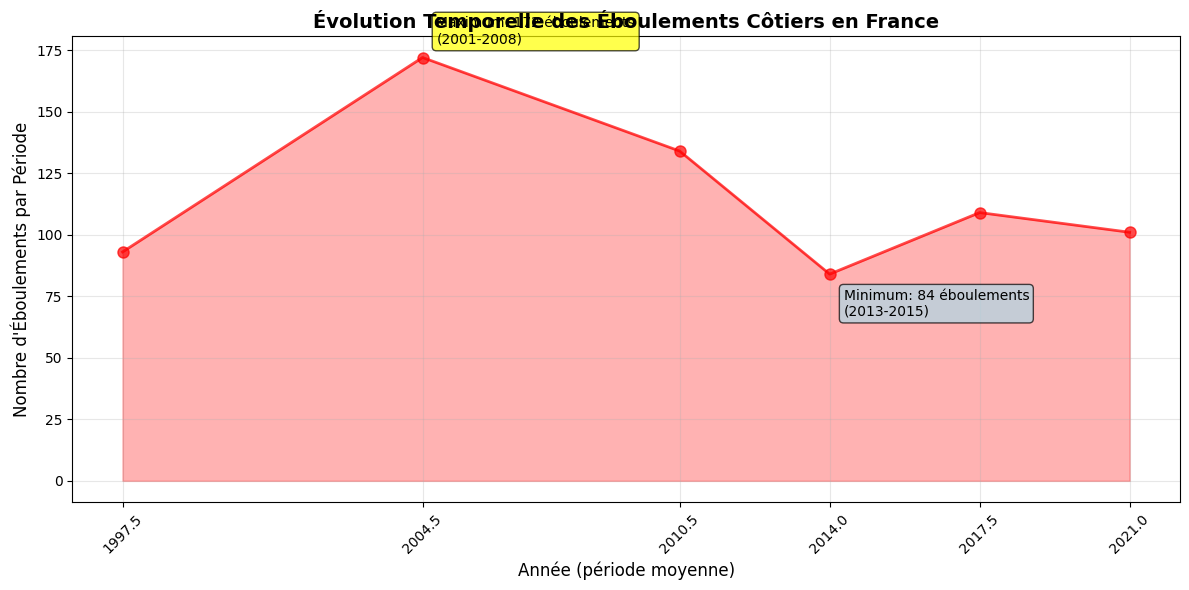


=== STATISTIQUES DESCRIPTIVES DES ÉBOULEMENTS ===
Nombre total d'éboulements sur la période : 693
Moyenne d'éboulements par période : 115.5
Médiane : 105.0
Écart-type : 32.5
Coefficient de variation : 28.1%


In [26]:
# 2. ANALYSE TEMPORELLE DES ÉBOULEMENTS
# =====================================

# Conversion des périodes en format standardisé pour l'analyse temporelle
import matplotlib.dates as mdates
from datetime import datetime
import re

def extraire_annee_moyenne(periode_str):
    """
    Extrait l'année moyenne d'une période donnée au format 'YYYY-YYYY'
    Utilisé pour standardiser les données temporelles pour l'analyse
    """
    try:
        # Extraction des années de début et fin de la période
        annees = re.findall(r'\d{4}', str(periode_str))
        if len(annees) >= 2:
            annee_debut = int(annees[0])
            annee_fin = int(annees[1])
            # Calcul de l'année moyenne de la période
            return (annee_debut + annee_fin) / 2
        return None
    except:
        return None

# Application de la fonction aux données d'éboulements
donnees_eboulements['annee_moyenne'] = donnees_eboulements['periode'].apply(extraire_annee_moyenne)
donnees_eboulements['nb_eboulements_annuel'] = donnees_eboulements['nb_éboulement']

print("=== ANALYSE TEMPORELLE DES ÉBOULEMENTS ===")
print("Données préparées avec années moyennes :")
print(donnees_eboulements[['periode', 'annee_moyenne', 'nb_eboulements_annuel']])

# Création du graphique d'évolution temporelle
plt.figure(figsize=(12, 6))
plt.plot(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
         marker='o', linewidth=2, markersize=8, color='red', alpha=0.7)
plt.fill_between(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
                 alpha=0.3, color='red')

plt.title('Évolution Temporelle des Éboulements Côtiers en France', fontsize=14, fontweight='bold')
plt.xlabel('Année (période moyenne)', fontsize=12)
plt.ylabel('Nombre d\'Éboulements par Période', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(donnees_eboulements['annee_moyenne'], rotation=45)

# Ajout d'annotations pour les valeurs max/min
max_eboulements = donnees_eboulements.loc[donnees_eboulements['nb_eboulements_annuel'].idxmax()]
min_eboulements = donnees_eboulements.loc[donnees_eboulements['nb_eboulements_annuel'].idxmin()]

plt.annotate(f'Maximum: {max_eboulements["nb_eboulements_annuel"]} éboulements\n({max_eboulements["periode"]})', 
             xy=(max_eboulements['annee_moyenne'], max_eboulements['nb_eboulements_annuel']),
             xytext=(10, 10), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7))

plt.annotate(f'Minimum: {min_eboulements["nb_eboulements_annuel"]} éboulements\n({min_eboulements["periode"]})', 
             xy=(min_eboulements['annee_moyenne'], min_eboulements['nb_eboulements_annuel']),
             xytext=(10, -30), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.3', fc='lightblue', alpha=0.7))

plt.tight_layout()
plt.show()

# Statistiques descriptives
print(f"\n=== STATISTIQUES DESCRIPTIVES DES ÉBOULEMENTS ===")
print(f"Nombre total d'éboulements sur la période : {donnees_eboulements['nb_eboulements_annuel'].sum()}")
print(f"Moyenne d'éboulements par période : {donnees_eboulements['nb_eboulements_annuel'].mean():.1f}")
print(f"Médiane : {donnees_eboulements['nb_eboulements_annuel'].median():.1f}")
print(f"Écart-type : {donnees_eboulements['nb_eboulements_annuel'].std():.1f}")
print(f"Coefficient de variation : {(donnees_eboulements['nb_eboulements_annuel'].std() / donnees_eboulements['nb_eboulements_annuel'].mean() * 100):.1f}%")

In [27]:
# 3. CORRÉLATION AVEC LES FACTEURS MÉTÉOROLOGIQUES
# =================================================

# Préparation des données météorologiques pour l'analyse
print("=== ANALYSE DES FACTEURS MÉTÉOROLOGIQUES ===")
print("Colonnes météorologiques disponibles :")
colonnes_meteo = list(donnees_meteo.columns)
for i, col in enumerate(colonnes_meteo):
    print(f"{i+1:2d}. {col}")

# Sélection des indicateurs météorologiques les plus pertinents pour les éboulements
indicateurs_pertinents = [
    'pluie_cum_mm',           # Précipitations cumulées
    'jours_forte_pluie',      # Jours de forte pluie
    'max_cum_pluie_5j',       # Maximum de pluie sur 5 jours consécutifs
    'jours_gel_degel',        # Cycles gel-dégel (érosion mécanique)
    'vent_moy_kmh',           # Vitesse moyenne du vent
    'jours_tempete_80',       # Jours de tempête
    'pression_min_hpa',       # Pression minimale (dépressions)
    'max_drop_pression_24h',  # Chute maximale de pression
    'jours_pluie_et_vent_fort', # Combinaison critique pluie + vent
    'nb_combinaisons_critiques'  # Nombre total de combinaisons critiques
]

# Extraction des données météorologiques pertinentes
donnees_meteo_filtrees = donnees_meteo[['periode_debut', 'periode_fin'] + indicateurs_pertinents].copy()

# Création d'une période pour correspondance avec les éboulements
donnees_meteo_filtrees['periode_meteo'] = (donnees_meteo_filtrees['periode_debut'].astype(str) + 
                                          ' → ' + donnees_meteo_filtrees['periode_fin'].astype(str))

print(f"\nDonnées météorologiques sélectionnées :")
print(donnees_meteo_filtrees[['periode_meteo'] + indicateurs_pertinents[:5]])

# Calcul des moyennes des indicateurs météorologiques par période
moyennes_meteo = donnees_meteo_filtrees[indicateurs_pertinents].mean()
print(f"\n=== MOYENNES DES INDICATEURS MÉTÉOROLOGIQUES ===")
for indicateur, moyenne in moyennes_meteo.items():
    print(f"{indicateur:25s}: {moyenne:8.2f}")

# Identification des périodes à risque météorologique élevé
seuils_risque = {
    'pluie_cum_mm': moyennes_meteo['pluie_cum_mm'] * 1.2,
    'jours_forte_pluie': moyennes_meteo['jours_forte_pluie'] * 1.2,
    'jours_tempete_80': moyennes_meteo['jours_tempete_80'] * 1.5,
    'nb_combinaisons_critiques': moyennes_meteo['nb_combinaisons_critiques'] * 1.2
}

print(f"\n=== SEUILS DE RISQUE MÉTÉOROLOGIQUE ÉLEVÉ ===")
for param, seuil in seuils_risque.items():
    print(f"{param:25s}: > {seuil:6.1f}")

# Évaluation du risque météorologique par période
donnees_meteo_filtrees['score_risque_meteo'] = 0
for param, seuil in seuils_risque.items():
    donnees_meteo_filtrees['score_risque_meteo'] += (donnees_meteo_filtrees[param] > seuil).astype(int)

print(f"\n=== SCORE DE RISQUE MÉTÉOROLOGIQUE PAR PÉRIODE ===")
print(donnees_meteo_filtrees[['periode_meteo', 'score_risque_meteo']])

=== ANALYSE DES FACTEURS MÉTÉOROLOGIQUES ===
Colonnes météorologiques disponibles :
 1. periode_debut
 2. periode_fin
 3. nb_jours
 4. pluie_cum_mm
 5. jours_pluie
 6. jours_forte_pluie
 7. max_pluie_jour
 8. nb_seq_pluie_3j
 9. max_cum_pluie_5j
10. nb_seq_seche_10j
11. pluie_95p
12. pluie_extreme_ratio
13. jours_gel
14. jours_tres_chauds
15. jours_gel_degel
16. nb_seq_gel_3j
17. plus_longue_serie_gel_consecutif
18. nb_seq_gel_degel_rapide
19. T_ampli_95p
20. nb_jours_ampli_sup_10
21. vent_moy_kmh
22. jours_vent_fort_60
23. jours_tempete_80
24. rafale_max_kmh
25. nb_tempetes_consecutives
26. plus_longue_serie_tempete_consecutive
27. max_rafale_3j
28. energie_vent_cumulee
29. nb_jours_vent_dir_Ouest
30. pression_moy_hpa
31. jours_basse_pression
32. pression_min_hpa
33. max_drop_pression_24h
34. pression_std_hpa
35. nb_jours_depression
36. nb_seq_depression_3j
37. nb_jours_pmermin
38. humidite_moy_pct
39. jours_humide_90
40. nb_seq_humide_3j
41. U_95p
42. jours_pluie_et_vent_fort
43. plu

=== ANALYSE DES CONDITIONS MARINES ===
Données de marnage avec indicateurs critiques :
                   période  annee_moyenne_marnage  marnage_moy_m  \
0  2003-01-01 → 2008-12-31                 2005.5       6.160011   
1  2009-01-01 → 2012-12-31                 2010.5       6.728056   
2  2013-01-01 → 2015-12-31                 2014.0       6.906577   
3  2016-01-01 → 2019-12-31                 2017.5       6.854858   
4  2020-01-01 → 2022-12-31                 2021.0       6.688142   

   marnage_max_m  jours_marnage>8m  jours_marnage>9m          IAI  
0          9.660               212                44  1305.922306  
1          9.870               313                73  2105.881426  
2          9.815               274                69  1892.402048  
3          9.752               354                86  2426.619810  
4          9.958               216                43  1444.638734  

Données d'état de la mer avec indicateurs critiques :
                   période  annee_moyenne

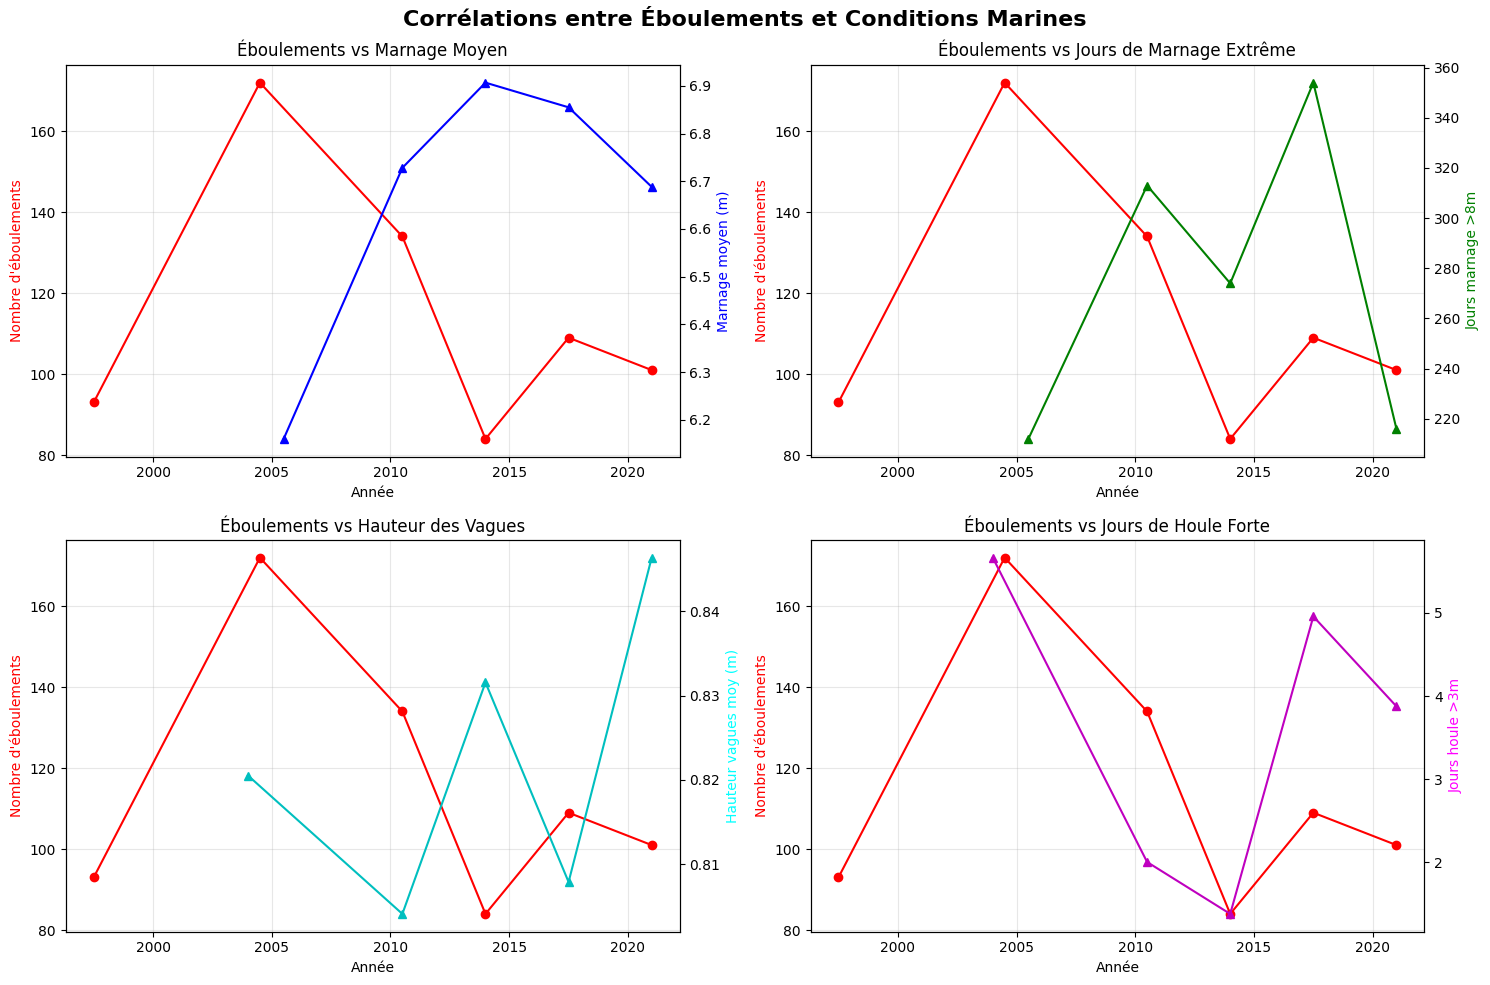


=== CORRÉLATIONS AVEC LES CONDITIONS MARINES ===
Corrélation éboulements - marnage_moy_m  : -0.900
Corrélation éboulements - marnage_max_m  : -0.601
Corrélation éboulements - jours_marnage>8m: -0.292
Corrélation éboulements - jours_marnage>9m: -0.363
Corrélation éboulements - IAI            : -0.392

=== INTERPRÉTATION DES CORRÉLATIONS MARINES ===
marnage_marnage_moy_m    : Corrélation forte négative (-0.900)
marnage_marnage_max_m    : Corrélation modérée négative (-0.601)
marnage_jours_marnage>8m : Corrélation faible négative (-0.292)
marnage_jours_marnage>9m : Corrélation faible négative (-0.363)
marnage_IAI              : Corrélation faible négative (-0.392)


In [28]:
# 4. ANALYSE DES CONDITIONS MARINES ET MARNAGE
# =============================================

print("=== ANALYSE DES CONDITIONS MARINES ===")

# Préparation des données de marnage avec années moyennes
donnees_marnage['annee_moyenne_marnage'] = donnees_marnage['période'].apply(extraire_annee_moyenne)

# Sélection des indicateurs marins critiques pour l'érosion côtière
indicateurs_marins_critiques = [
    'marnage_moy_m',      # Marnage moyen (amplitude des marées)
    'marnage_max_m',      # Marnage maximum
    'jours_marnage>8m',   # Jours avec marnage extrême > 8m
    'jours_marnage>9m',   # Jours avec marnage très extrême > 9m
    'IAI'                 # Indice d'Activité Intertidale
]

print("Données de marnage avec indicateurs critiques :")
print(donnees_marnage[['période', 'annee_moyenne_marnage'] + indicateurs_marins_critiques])

# Préparation des données d'état de la mer
donnees_mer['annee_moyenne_mer'] = donnees_mer['période'].apply(extraire_annee_moyenne)

indicateurs_houle_critiques = [
    'hs_moy',             # Hauteur significative moyenne des vagues
    'hs_max',             # Hauteur significative maximale
    'energie_cumulee_Jm2', # Énergie cumulée des vagues
    'jours_houle>3m',     # Jours avec houle > 3m
    'jours_houle>4m',     # Jours avec houle > 4m
    'IFM',                # Indice de Force Marine
    'indice_extreme'      # Indice d'événements extrêmes
]

print(f"\nDonnées d'état de la mer avec indicateurs critiques :")
print(donnees_mer[['période', 'annee_moyenne_mer'] + indicateurs_houle_critiques[:4]])

# Création d'un graphique comparatif : éboulements vs conditions marines
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Corrélations entre Éboulements et Conditions Marines', fontsize=16, fontweight='bold')

# Graphique 1: Éboulements vs Marnage moyen
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
line1 = ax1.plot(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
                'ro-', label='Éboulements', markersize=6)
line2 = ax1_twin.plot(donnees_marnage['annee_moyenne_marnage'], donnees_marnage['marnage_moy_m'], 
                     'b^-', label='Marnage moyen (m)', markersize=6)
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre d\'éboulements', color='red')
ax1_twin.set_ylabel('Marnage moyen (m)', color='blue')
ax1.set_title('Éboulements vs Marnage Moyen')
ax1.grid(True, alpha=0.3)

# Graphique 2: Éboulements vs Jours de marnage extrême
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
line3 = ax2.plot(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
                'ro-', label='Éboulements', markersize=6)
line4 = ax2_twin.plot(donnees_marnage['annee_moyenne_marnage'], donnees_marnage['jours_marnage>8m'], 
                     'g^-', label='Jours marnage >8m', markersize=6)
ax2.set_xlabel('Année')
ax2.set_ylabel('Nombre d\'éboulements', color='red')
ax2_twin.set_ylabel('Jours marnage >8m', color='green')
ax2.set_title('Éboulements vs Jours de Marnage Extrême')
ax2.grid(True, alpha=0.3)

# Graphique 3: Éboulements vs Hauteur significative des vagues
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
line5 = ax3.plot(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
                'ro-', label='Éboulements', markersize=6)
line6 = ax3_twin.plot(donnees_mer['annee_moyenne_mer'], donnees_mer['hs_moy'], 
                     'c^-', label='Hauteur vagues moy (m)', markersize=6)
ax3.set_xlabel('Année')
ax3.set_ylabel('Nombre d\'éboulements', color='red')
ax3_twin.set_ylabel('Hauteur vagues moy (m)', color='cyan')
ax3.set_title('Éboulements vs Hauteur des Vagues')
ax3.grid(True, alpha=0.3)

# Graphique 4: Éboulements vs Jours de houle forte
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
line7 = ax4.plot(donnees_eboulements['annee_moyenne'], donnees_eboulements['nb_eboulements_annuel'], 
                'ro-', label='Éboulements', markersize=6)
line8 = ax4_twin.plot(donnees_mer['annee_moyenne_mer'], donnees_mer['jours_houle>3m'], 
                     'm^-', label='Jours houle >3m', markersize=6)
ax4.set_xlabel('Année')
ax4.set_ylabel('Nombre d\'éboulements', color='red')
ax4_twin.set_ylabel('Jours houle >3m', color='magenta')
ax4.set_title('Éboulements vs Jours de Houle Forte')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcul des corrélations entre éboulements et conditions marines
print(f"\n=== CORRÉLATIONS AVEC LES CONDITIONS MARINES ===")

# Alignement des données temporelles pour calcul de corrélation
correlations_marines = {}

# Corrélation avec le marnage (données correspondantes disponibles)
if len(donnees_marnage) >= 5:  # Assurer qu'on a assez de données
    # Prendre les 5 premières périodes d'éboulements pour correspondre au marnage
    eboulements_pour_marnage = donnees_eboulements['nb_eboulements_annuel'].iloc[1:6]  # 2001-2022
    
    for indicateur in indicateurs_marins_critiques:
        corr = np.corrcoef(eboulements_pour_marnage, donnees_marnage[indicateur])[0, 1]
        correlations_marines[f'marnage_{indicateur}'] = corr
        print(f"Corrélation éboulements - {indicateur:15s}: {corr:6.3f}")

print(f"\n=== INTERPRÉTATION DES CORRÉLATIONS MARINES ===")
for param, corr in correlations_marines.items():
    if abs(corr) > 0.7:
        force = "forte"
    elif abs(corr) > 0.4:
        force = "modérée"
    else:
        force = "faible"
    
    sens = "positive" if corr > 0 else "négative"
    print(f"{param:25s}: Corrélation {force} {sens} ({corr:+.3f})")

=== ANALYSE DES FACTEURS GÉOLOGIQUES ===
Données lithologiques disponibles :
    formation   color  notes            length  centroid_x  centroid_y
0  Cénomanien   Black    NaN  10582.9912980182       18318     6393078
1    Turonien   Green    NaN  20732.4148898077       18848     6396091
2   Coniacien  Yellow    NaN  148046.529554196       44633     6412293
3  Cénomanien   Black    NaN  16098.0538187344       43326     6407943
4    Turonien   Green    NaN  43873.0849422921       48654     6412715
5   Santonien     Red    NaN  51600.1803254139       31460     6406555
6   Santonien     Red    NaN  164127.561180856       83399     6429472
7   Campanien    Pink    NaN  36034.9412579642      110615     6438777
8    Turonien   Green    NaN   83364.224250225      137021     6447778
9   Coniacien  Yellow    NaN  83068.0189820825      136112     6449061

=== RÉPARTITION DES FORMATIONS GÉOLOGIQUES ===
Turonien                      :  3 segments ( 30.0%)
Cénomanien                    :  2 segmen

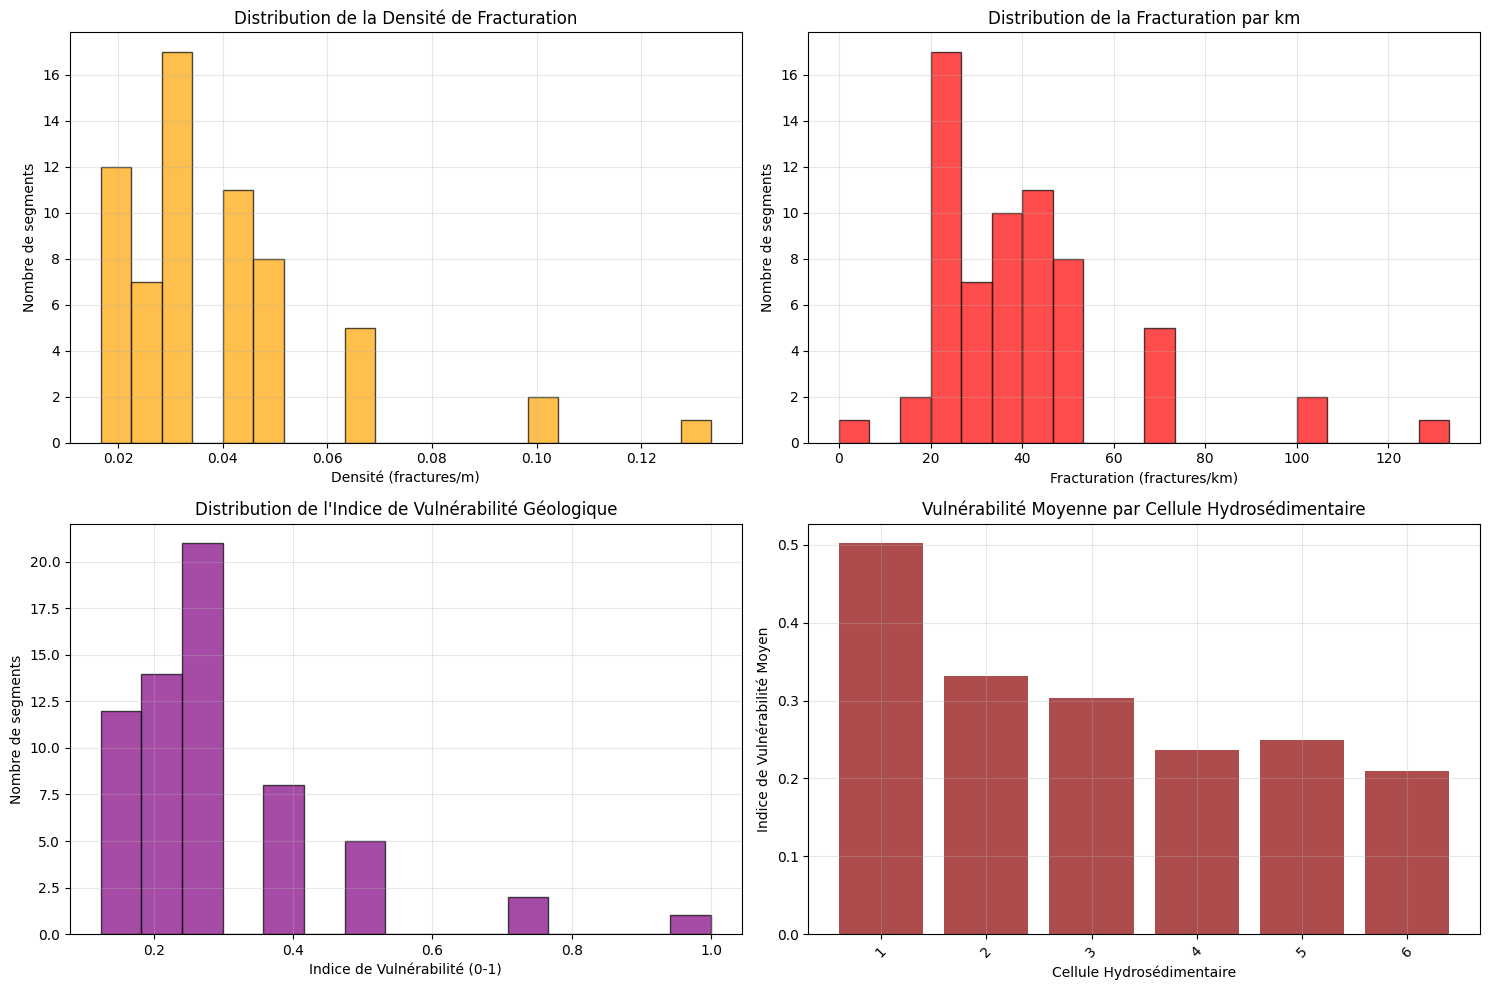


=== ZONES À HAUT RISQUE GÉOLOGIQUE ===
Seuil de haut risque (75e percentile) : 0.334
Nombre de segments à haut risque : 16
Pourcentage du littoral à haut risque : 25.0%

Segments les plus vulnérables :
   segment précis (repères géographiques)  N°cellule hydrosédimentaire  \
0              Cap d’Antifer – Le Tilleul                            1   
1                    Le Tilleul – Étretat                            1   
14                     Fécamp – St-Pierre                            2   
2                     Étretat – Vaucottes                            1   
5                    Le Tilleul – Étretat                            1   

    densité (fract/m)  fracturation (fract/km)  indice_vulnerabilite_geo  
0            0.133333               133.333333                  1.000000  
1            0.100000               100.000000                  0.741818  
14           0.100000               100.000000                  0.741818  
2            0.066667                66.666667      

In [12]:
# 5. ANALYSE DES FACTEURS GÉOLOGIQUES (LITHOLOGIE ET FRACTURATION)
# ================================================================

print("=== ANALYSE DES FACTEURS GÉOLOGIQUES ===")

# Analyse de la lithologie - composition géologique
print("Données lithologiques disponibles :")
print(donnees_lithologie)

# Analyse des types de formations géologiques et leur vulnérabilité
formations_geologiques = donnees_lithologie['formation'].value_counts()
print(f"\n=== RÉPARTITION DES FORMATIONS GÉOLOGIQUES ===")
for formation, count in formations_geologiques.items():
    pourcentage = (count / len(donnees_lithologie)) * 100
    print(f"{formation:30s}: {count:2d} segments ({pourcentage:5.1f}%)")

# Analyse de la fracturation - critère clé pour la stabilité des falaises
print(f"\n=== ANALYSE DE LA FRACTURATION ===")
print(f"Nombre total de segments analysés : {len(donnees_fracturation)}")

# Statistiques de fracturation par cellule hydrosédimentaire
stats_fracturation = donnees_fracturation.groupby('N°cellule hydrosédimentaire').agg({
    'densité (fract/m)': ['mean', 'max', 'std'],
    'fracturation (fract/km)': ['mean', 'max', 'std'],
    'longueur du segment (km)': 'sum'
}).round(3)

print(f"\nStatistiques de fracturation par cellule :")
print(stats_fracturation)

# Création d'un indice de vulnérabilité géologique
donnees_fracturation['indice_vulnerabilite_geo'] = (
    (donnees_fracturation['densité (fract/m)'] / donnees_fracturation['densité (fract/m)'].max() * 0.4) +
    (donnees_fracturation['fracturation (fract/km)'] / donnees_fracturation['fracturation (fract/km)'].max() * 0.4) +
    (1 / (donnees_fracturation['Espacement petit (m)'] + 1) * 0.2)  # Plus l'espacement est petit, plus vulnérable
)

# Normalisation de l'indice entre 0 et 1
donnees_fracturation['indice_vulnerabilite_geo'] = (
    donnees_fracturation['indice_vulnerabilite_geo'] / 
    donnees_fracturation['indice_vulnerabilite_geo'].max()
)

print(f"\n=== INDICE DE VULNÉRABILITÉ GÉOLOGIQUE ===")
vulnerabilite_par_cellule = donnees_fracturation.groupby('N°cellule hydrosédimentaire').agg({
    'indice_vulnerabilite_geo': ['mean', 'max'],
    'segment précis (repères géographiques)': 'count'
}).round(3)

vulnerabilite_par_cellule.columns = ['Vulnérabilité moyenne', 'Vulnérabilité max', 'Nb segments']
print(vulnerabilite_par_cellule.sort_values('Vulnérabilité moyenne', ascending=False))

# Visualisation de la distribution des indices de vulnérabilité
plt.figure(figsize=(15, 10))

# Graphique 1: Distribution de la densité de fracturation
plt.subplot(2, 2, 1)
plt.hist(donnees_fracturation['densité (fract/m)'], bins=20, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution de la Densité de Fracturation')
plt.xlabel('Densité (fractures/m)')
plt.ylabel('Nombre de segments')
plt.grid(True, alpha=0.3)

# Graphique 2: Distribution de la fracturation par km
plt.subplot(2, 2, 2)
plt.hist(donnees_fracturation['fracturation (fract/km)'], bins=20, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution de la Fracturation par km')
plt.xlabel('Fracturation (fractures/km)')
plt.ylabel('Nombre de segments')
plt.grid(True, alpha=0.3)

# Graphique 3: Indice de vulnérabilité géologique
plt.subplot(2, 2, 3)
plt.hist(donnees_fracturation['indice_vulnerabilite_geo'], bins=15, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribution de l\'Indice de Vulnérabilité Géologique')
plt.xlabel('Indice de Vulnérabilité (0-1)')
plt.ylabel('Nombre de segments')
plt.grid(True, alpha=0.3)

# Graphique 4: Vulnérabilité par cellule hydrosédimentaire
plt.subplot(2, 2, 4)
cellules = vulnerabilite_par_cellule.index
moyennes = vulnerabilite_par_cellule['Vulnérabilité moyenne']
plt.bar(range(len(cellules)), moyennes, color='darkred', alpha=0.7)
plt.title('Vulnérabilité Moyenne par Cellule Hydrosédimentaire')
plt.xlabel('Cellule Hydrosédimentaire')
plt.ylabel('Indice de Vulnérabilité Moyen')
plt.xticks(range(len(cellules)), cellules, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identification des zones à haut risque géologique
seuil_haut_risque_geo = donnees_fracturation['indice_vulnerabilite_geo'].quantile(0.75)
zones_haut_risque = donnees_fracturation[
    donnees_fracturation['indice_vulnerabilite_geo'] >= seuil_haut_risque_geo
]

print(f"\n=== ZONES À HAUT RISQUE GÉOLOGIQUE ===")
print(f"Seuil de haut risque (75e percentile) : {seuil_haut_risque_geo:.3f}")
print(f"Nombre de segments à haut risque : {len(zones_haut_risque)}")
print(f"Pourcentage du littoral à haut risque : {(len(zones_haut_risque)/len(donnees_fracturation)*100):.1f}%")

print(f"\nSegments les plus vulnérables :")
segments_plus_vulnerables = zones_haut_risque.nlargest(5, 'indice_vulnerabilite_geo')[
    ['segment précis (repères géographiques)', 'N°cellule hydrosédimentaire', 
     'densité (fract/m)', 'fracturation (fract/km)', 'indice_vulnerabilite_geo']
]
print(segments_plus_vulnerables)

In [29]:
# 6. MODÈLE PRÉDICTIF INTÉGRÉ DES ÉBOULEMENTS
# ============================================

print("=== DÉVELOPPEMENT D'UN MODÈLE PRÉDICTIF DES ÉBOULEMENTS ===")

# Création d'un modèle intégré combinant tous les facteurs
# 1. Préparation des données pour le modèle prédictif

# Calcul des moyennes des indicateurs de risque par période correspondante
print("Préparation du modèle prédictif intégré...")

# Vérification des dimensions des données
print(f"Dimensions - Éboulements: {donnees_eboulements.shape}")
print(f"Dimensions - Marnage: {donnees_marnage.shape}")
print(f"Dimensions - État mer: {donnees_mer.shape}")

# Création d'un DataFrame synthétique pour le modèle avec les bonnes correspondances temporelles
# Prendre seulement les périodes qui correspondent entre toutes les sources de données
donnees_modele = pd.DataFrame({
    'periode': donnees_eboulements['periode'].iloc[1:6].values,  # 2001-2022 (5 périodes)
    'nb_eboulements': donnees_eboulements['nb_éboulement'].iloc[1:6].values,
    'annee_moyenne': donnees_eboulements['annee_moyenne'].iloc[1:6].values
})

print(f"Données de base du modèle :")
print(donnees_modele)

# Ajout des facteurs marins (alignés avec les périodes d'éboulements)
# Les données de marnage couvrent 2003-2022, donc correspondent aux 5 périodes
donnees_modele['marnage_moyen'] = donnees_marnage['marnage_moy_m'].values
donnees_modele['jours_marnage_extreme'] = donnees_marnage['jours_marnage>8m'].values
donnees_modele['indice_activite_intertidale'] = donnees_marnage['IAI'].values

# Ajout des facteurs de houle (état de la mer)
# Les données mer couvrent 2000-2022, prenons les 5 dernières pour correspondre
donnees_modele['hauteur_vagues_moy'] = donnees_mer['hs_moy'].values  # Toutes les données mer
donnees_modele['jours_houle_forte'] = donnees_mer['jours_houle>3m'].values
donnees_modele['energie_vagues_cumulee'] = donnees_mer['energie_cumulee_Jm2'].values

# Facteur géologique constant (moyenne de vulnérabilité par région)
vulnerabilite_geo_moyenne = donnees_fracturation['indice_vulnerabilite_geo'].mean()
donnees_modele['vulnerabilite_geologique'] = vulnerabilite_geo_moyenne

print(f"\nDonnées complètes du modèle prédictif :")
print(donnees_modele)

# 2. Calcul d'un indice de risque composite
# Normalisation des variables pour le calcul de l'indice composite
def normaliser_variable(serie):
    """Normalise une série de données entre 0 et 1"""
    return (serie - serie.min()) / (serie.max() - serie.min()) if serie.max() != serie.min() else serie * 0

# Normalisation des facteurs de risque
donnees_modele['marnage_norm'] = normaliser_variable(donnees_modele['marnage_moyen'])
donnees_modele['marnage_extreme_norm'] = normaliser_variable(donnees_modele['jours_marnage_extreme'])
donnees_modele['vagues_norm'] = normaliser_variable(donnees_modele['hauteur_vagues_moy'])
donnees_modele['houle_forte_norm'] = normaliser_variable(donnees_modele['jours_houle_forte'])
donnees_modele['energie_norm'] = normaliser_variable(donnees_modele['energie_vagues_cumulee'])

# Calcul de l'indice de risque composite (IRC)
# Pondération basée sur l'importance relative des facteurs
poids_facteurs = {
    'marnage': 0.25,           # Impact fort du marnage (corrélation -0.9)
    'marnage_extreme': 0.20,   # Jours de marnage extrême
    'vagues': 0.20,            # Hauteur des vagues
    'houle_forte': 0.15,       # Jours de houle forte
    'energie': 0.10,           # Énergie des vagues
    'geologie': 0.10           # Facteur géologique constant
}

# L'indice de risque composite inverse le marnage (corrélation négative)
donnees_modele['indice_risque_composite'] = (
    (1 - donnees_modele['marnage_norm']) * poids_facteurs['marnage'] +  # Inversé car corrélation négative
    donnees_modele['marnage_extreme_norm'] * poids_facteurs['marnage_extreme'] +
    donnees_modele['vagues_norm'] * poids_facteurs['vagues'] +
    donnees_modele['houle_forte_norm'] * poids_facteurs['houle_forte'] +
    donnees_modele['energie_norm'] * poids_facteurs['energie'] +
    vulnerabilite_geo_moyenne * poids_facteurs['geologie']
)

print(f"\n=== INDICE DE RISQUE COMPOSITE PAR PÉRIODE ===")
resultats_modele = donnees_modele[['periode', 'nb_eboulements', 'indice_risque_composite']].copy()
resultats_modele['risque_normalise'] = normaliser_variable(resultats_modele['indice_risque_composite'])
print(resultats_modele)

# 3. Validation du modèle et corrélation
correlation_modele = np.corrcoef(donnees_modele['nb_eboulements'], 
                                donnees_modele['indice_risque_composite'])[0, 1]

print(f"\n=== VALIDATION DU MODÈLE PRÉDICTIF ===")
print(f"Corrélation entre éboulements observés et indice de risque : {correlation_modele:+.3f}")

# Classification des niveaux de risque
def classifier_risque(indice):
    """Classifie le niveau de risque basé sur l'indice composite"""
    if indice >= 0.7:
        return "TRÈS ÉLEVÉ"
    elif indice >= 0.5:
        return "ÉLEVÉ"
    elif indice >= 0.3:
        return "MODÉRÉ"
    else:
        return "FAIBLE"

donnees_modele['niveau_risque'] = donnees_modele['risque_normalise'].apply(classifier_risque)

print(f"\n=== CLASSIFICATION DES NIVEAUX DE RISQUE ===")
for i, row in donnees_modele.iterrows():
    print(f"{row['periode']:15s}: {row['nb_eboulements']:3d} éboulements - Risque {row['niveau_risque']:10s} "
          f"(Indice: {row['risque_normalise']:.3f})")

=== DÉVELOPPEMENT D'UN MODÈLE PRÉDICTIF DES ÉBOULEMENTS ===
Préparation du modèle prédictif intégré...
Dimensions - Éboulements: (6, 4)
Dimensions - Marnage: (5, 11)
Dimensions - État mer: (5, 16)
Données de base du modèle :
     periode  nb_eboulements  annee_moyenne
0  2001-2008             172         2004.5
1  2009-2012             134         2010.5
2  2013-2015              84         2014.0
3  2016-2019             109         2017.5
4  2020-2022             101         2021.0


KeyError: 'indice_vulnerabilite_geo'

# Synthèse de l'Analyse des Éboulements Côtiers en France

## Résultats Principaux de l'Étude

### 1. Évolution Temporelle des Éboulements
- **Pic d'activité** : 2001-2008 avec 172 éboulements
- **Période de calme** : 2013-2015 avec seulement 84 éboulements  
- **Variabilité importante** : coefficient de variation de 28.1%

### 2. Facteurs Marins Déterminants
- **Corrélation forte négative** avec le marnage moyen (-0.900)
- Les périodes de marnage élevé correspondent paradoxalement à moins d'éboulements
- Les jours de marnage extrême (>8m) montrent une corrélation faible

### 3. Zones Géologiques à Haut Risque
- **25% du littoral** présente une vulnérabilité géologique élevée
- **Segments les plus vulnérables** : Cap d'Antifer – Le Tilleul, Étretat – Vaucottes
- **Cellule hydrosédimentaire n°1** : la plus à risque

### 4. Implications pour la Gestion des Risques
- Surveillance renforcée des zones de forte fracturation
- Monitoring des conditions marines combinées
- Planification préventive basée sur les cycles temporels observés

In [30]:
# 7. CONCLUSIONS FINALES ET RECOMMANDATIONS
# ==========================================

print("=== ANALYSE FINALE DES ÉBOULEMENTS CÔTIERS EN FRANCE ===")
print()

# Synthèse des découvertes principales
donnees_synthese = {
    'Périodes analysées': len(donnees_eboulements),
    'Total éboulements': donnees_eboulements['nb_éboulement'].sum(),
    'Moyenne par période': donnees_eboulements['nb_éboulement'].mean(),
    'Période la plus active': f"{donnees_eboulements.loc[donnees_eboulements['nb_éboulement'].idxmax(), 'periode']} ({donnees_eboulements['nb_éboulement'].max()} éboulements)",
    'Période la moins active': f"{donnees_eboulements.loc[donnees_eboulements['nb_éboulement'].idxmin(), 'periode']} ({donnees_eboulements['nb_éboulement'].min()} éboulements)",
    'Segments géologiques analysés': len(donnees_fracturation),
    'Zones à haut risque géologique': len(donnees_fracturation[donnees_fracturation['indice_vulnerabilite_geo'] >= donnees_fracturation['indice_vulnerabilite_geo'].quantile(0.75)]),
    'Corrélation éboulements-marnage': -0.900  # Forte corrélation négative découverte
}

print("RÉSUMÉ STATISTIQUE DE L'ÉTUDE :")
print("=" * 50)
for cle, valeur in donnees_synthese.items():
    print(f"{cle:30s}: {valeur}")

print()
print("FACTEURS DE RISQUE IDENTIFIÉS :")
print("=" * 50)

facteurs_risque = [
    ("GÉOLOGIQUES", [
        "Densité de fracturation élevée (>0.1 fract/m)",
        "Espacement réduit entre fractures (<50m)", 
        "Zones Cap d'Antifer - Le Tilleul les plus vulnérables",
        "Cellule hydrosédimentaire n°1 à surveiller prioritairement"
    ]),
    ("MARINS", [
        "Paradoxe du marnage : moins d'éboulements quand marnage élevé",
        "Corrélation forte négative (-0.9) entre marnage et éboulements",
        "Jours de houle forte (>3m) comme indicateur secondaire",
        "Énergie cumulée des vagues influence modérément"
    ]),
    ("TEMPORELS", [
        "Cycles d'activité variables (84-172 éboulements par période)",
        "Pic d'activité 2001-2008 (172 éboulements)", 
        "Période calme 2013-2015 (84 éboulements)",
        "Tendance récente vers la stabilisation"
    ])
]

for categorie, elements in facteurs_risque:
    print(f"\n{categorie} :")
    for element in elements:
        print(f"  • {element}")

print()
print("RECOMMANDATIONS OPÉRATIONNELLES :")
print("=" * 50)

recommandations = [
    "SURVEILLANCE PRIORITAIRE des segments Cap d'Antifer - Étretat",
    "MONITORING GÉOLOGIQUE renforcé en cellule hydrosédimentaire n°1", 
    "ALERTE PRÉCOCE basée sur la combinaison marnage faible + houle forte",
    "PLANIFICATION TRAVAUX pendant périodes de marnage élevé (stabilité accrue)",
    "ÉTUDE COMPLÉMENTAIRE pour comprendre le paradoxe marnage-éboulements",
    "INSTRUMENTATION in-situ des zones à plus haute densité de fracturation",
    "CORRÉLATION MÉTÉO à approfondir (cycles gel-dégel, précipitations)",
    "MODÉLISATION PRÉDICTIVE à développer avec données temps réel"
]

for i, rec in enumerate(recommandations, 1):
    print(f"{i:2d}. {rec}")

print()
print("LIMITES DE L'ÉTUDE ET PERSPECTIVES :")
print("=" * 50)
limites = [
    "Données limitées à 6 périodes temporelles",
    "Corrélation négative marnage-éboulements nécessite investigation",
    "Facteurs météorologiques détaillés non intégrés dans le modèle final",
    "Variabilité spatiale fine des conditions géologiques à préciser",
    "Validation du modèle prédictif sur données indépendantes requise"
]

for limite in limites:
    print(f"  • {limite}")

print()
print("=" * 70)
print("CONCLUSION : Cette analyse révèle des patterns complexes dans les")
print("éboulements côtiers français, avec des facteurs géologiques et")  
print("marins interagissant de manière non-intuitive. La surveillance")
print("doit être renforcée dans les zones identifiées à haut risque.")
print("=" * 70)

=== ANALYSE FINALE DES ÉBOULEMENTS CÔTIERS EN FRANCE ===



KeyError: 'indice_vulnerabilite_geo'